In [4]:
from IPython.display import HTML, SVG, display, Image
HTML('''<script>code_show=true; 
    function code_toggle() {
     if (code_show){$('div.input').hide();} else {$('div.input').show();}
     code_show = !code_show}
    $( document ).ready(code_toggle);</script>
    <a href="javascript:code_toggle()">show/hide source</a>
    ''')

In [18]:
import bokeh.plotting as bk
import matplotlib.pyplot as plt
from bokeh.models.glyphs import Text

from bk_tools import bk_image,bk_image_hoover,ima_to_rgba32


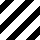
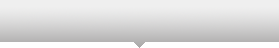
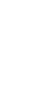
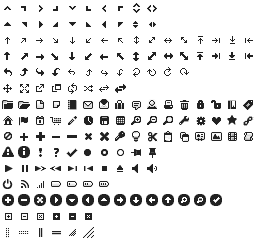
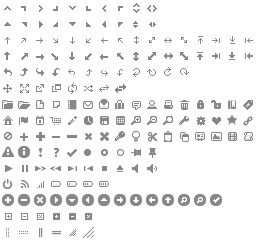
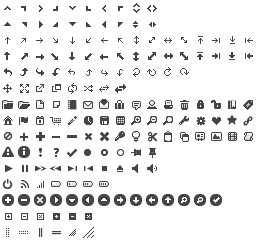
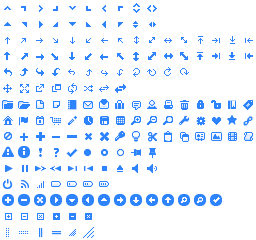
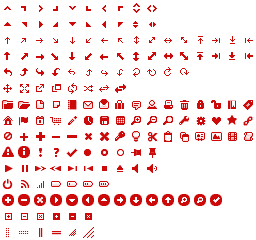
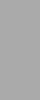
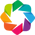
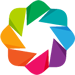
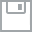
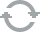
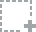
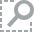
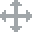
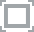
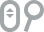

In [19]:
bk.output_notebook()

In [20]:
import numpy as np

In [21]:
from scipy import optimize
import numpy as np

def f(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)

fig = bk.figure()
fig.plot_height = 600
fig.plot_width = 600
fig.line(x, f(x))
bk.show(fig)

In [9]:
from skimage import data
import skimage.filters.rank as skr
from skimage.morphology import disk

rgb = data.lena()[-1::-1,:,:]
gima = rgb[:,:,0]

gr = skr.gradient(gima,disk(2))

h,hbin = np.histogram(gima.flatten(),range(256))

m,n,p = rgb.shape
mask = np.zeros((m,n),dtype=np.uint8)
mask[:256,:256] = 255

img1,m,n = ima_to_rgba32(rgb,alpha=.8)
img2,m,n = ima_to_rgba32(gr,mask=mask)

fig = bk.figure(x_range=[0,n], y_range=[0,m])
fig.title = "Lena"

fig.image_rgba(image=[img1], x=[0], y=[0], dw=[n], dh=[m])
fig.image_rgba(image=[img2], x=[0], y=[0], dw=[n], dh=[m])

fig.line(hbin[1:],255.*h/np.max(h),color="#0000FF", alpha=.5)
bk.show(fig);  # open a browser

In [10]:
from skimage.data import camera
import skimage.filters.rank as skr
from skimage.morphology import disk

import numpy as np

def test_f(ima,f,radii,title=''):
    s = ima
    mask = np.zeros_like(s)
    mask[:,:s.shape[1]/2] = 255
    
    img0,m,n = ima_to_rgba32(ima)
    fig = bk.figure(x_range=[0,n*2], y_range=[0,m*(len(radii)+1)])
    fig.image_rgba(image=[img0], x=[0], y=[0], dw=[n], dh=[m])
    for i,r in enumerate(radii):
        filt = f(g,disk(r))
    
        img,m,n = ima_to_rgba32(filt,mask=mask)
        fig.image_rgba(image=[img0], x=[0], y=[(i+1)*m], dw=[n], dh=[m])
        fig.image_rgba(image=[img], x=[0], y=[(i+1)*m], dw=[n], dh=[m])
        
        fig.text(x=n, y=m*(i+1), text=[" radius: %d"%r])        
        
    fig.title = title
    bk.show(fig);  # open a browser
    
 

In [11]:
g = camera()[-1::-1,:]
f = skr.gradient

test_f(g,f,range(1,3),'gradient')

In [12]:
g = camera()[-1::-1,:]
f = skr.equalize

test_f(g,f,range(10,30,10),'equalize')

In [13]:
bk_image_hoover((disk(3)==0)*255)

In [14]:
rgb32,m,n = ima_to_rgba32(rgb[100:110,100:150,:])

In [15]:
bk_image_hoover(rgb[::30,::30,:])

In [22]:
from tools import ext_image

In [23]:
rgb = ext_image('mandrill')
bk_image(rgb,flip=True)

In [24]:
type(rgb)

numpy.ndarray

In [25]:
from skimage.color import rgb2lab

fig = bk.figure()
fig.plot_height = 400
fig.plot_width = 400

sub = rgb[::10,::10,:]
xyz = rgb2lab(sub)
x = xyz[:,:,1].flatten()
z = xyz[:,:,2].flatten()
color = ima_to_rgba32(sub,invert_order=True,string=True)

fig.scatter(x, z, marker='o',
            line_color=None, fill_color=color, 
            fill_alpha=.5, size=12)

bk.show(fig)

